In [1]:
import numpy as np
import matplotlib.pyplot as plt
import halotools.mock_observables

%matplotlib inline

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
MEDIUM_SIZE = 30
SMALL_SIZE = 22
SSSMALL_SIZE = 16

plt.rc('font', size=SSSMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) 

In [3]:
def compute_correlation_func(log10_stellar_mass, formation_times, positions, min_mass=10.0, max_mass=10.5):
    ii = (log10_stellar_mass>min_mass) & (log10_stellar_mass < max_mass)
    all_pos = positions[ii,:]
    all_formation_z = formation_times[ii]
    percentiles = np.percentile(all_formation_z, [25,75])
    ii_early = all_formation_z > percentiles[1]
    ii_late  = all_formation_z < percentiles[0]
    print('EARLY', np.count_nonzero(ii_early))
    print('LATE', np.count_nonzero(ii_early))
    early_pos = all_pos[ii_early,:]
    late_pos = all_pos[ii_late, :]
    all_corr = {}
    r = np.linspace(5000.0, 10000.0,10)
    all_corr['early'] = halotools.mock_observables.tpcf(early_pos, r, period=205000.0, estimator='Landy-Szalay')
    all_corr['late'] = halotools.mock_observables.tpcf(late_pos, r, period=205000.0, estimator='Landy-Szalay')
    all_corr['all'] = halotools.mock_observables.tpcf(all_pos, r, period=205000.0, estimator='Landy-Szalay')
    all_corr['r'] = 0.5*(r[1:]+r[:-1])
    return all_corr

def compute_ratio(log10_stellar_mass, formation_times, positions):
    log_mass_bins = np.arange(9.0, 11.5, 0.25)
    ratio_late_mean = np.ones(len(log_mass_bins))
    ratio_late_std = ratio_late_mean.copy()
    ratio_early_mean = ratio_late_mean.copy()
    ratio_early_std = ratio_late_mean.copy()

    for i, min_mass_bin in enumerate(log_mass_bins):
        corr = compute_correlation_func(log10_stellar_mass, formation_times, positions, min_mass=min_mass_bin, max_mass=min_mass_bin+0.5)
        ratio_late_mean[i] = np.mean(corr['late']/corr['all'])
        ratio_late_std[i] = np.std(corr['late']/corr['all'])
        ratio_early_mean[i] = np.mean(corr['early']/corr['all'])
        ratio_early_std[i] = np.std(corr['early']/corr['all'])
    return {'log_mass_bins':log_mass_bins, 
            'ratio_late_mean':ratio_late_mean, 'ratio_late_std':ratio_late_std,
            'ratio_early_mean':ratio_early_mean, 'ratio_early_std':ratio_early_std}

def compute_median_assembly(log10_stellar_mass, formation_times):
    log_mass_bins = np.arange(9.0, 11.5, 0.25)
    median_assembly = np.ones(len(log_mass_bins))

    for i, min_mass_bin in enumerate(log_mass_bins):
        ii = (log10_stellar_mass>min_mass_bin) & (log10_stellar_mass < (min_mass_bin+0.5))
        median_assembly[i] = np.median(formation_times[ii])

    return {'log_mass_bins':log_mass_bins, 'median_assembly': median_assembly}

In [4]:
formation_data = np.loadtxt("/Users/forero/Illustris_data/formation_times_TNG300/301/Galaxies/Central_Galaxies/Central_Galaxies.dat")
log10_stellar_mass  = np.log10(formation_data[:,4]) + 10
positions = formation_data[:, 5:]
formation_times = formation_data[:, 3]
ratio_central = compute_ratio(log10_stellar_mass, formation_times, positions)
median_central = compute_median_assembly(log10_stellar_mass, formation_times)

EARLY 11729
LATE 11729
EARLY 10681
LATE 10681
EARLY 9286
LATE 9286
EARLY 8139
LATE 8139
EARLY 7172
LATE 7172
EARLY 4621
LATE 4621
EARLY 2078
LATE 2078
EARLY 951
LATE 951
EARLY 430
LATE 430
EARLY 201
LATE 201


In [5]:
formation_data = np.loadtxt("/Users/forero/Illustris_data/formation_times_TNG300/301/Galaxies/All_Galaxies/ZM_Galaxies3001.dat")
log10_stellar_mass  = np.log10(formation_data[:,4]) + 10
positions = formation_data[:, 5:]
formation_times = formation_data[:, 3]
ratio_all = compute_ratio(log10_stellar_mass, formation_times, positions)
median_all = compute_median_assembly(log10_stellar_mass, formation_times)

EARLY 20873
LATE 20873
EARLY 18447
LATE 18447
EARLY 15184
LATE 15184
EARLY 13970
LATE 13970
EARLY 11405
LATE 11405
EARLY 6890
LATE 6890
EARLY 3056
LATE 3056
EARLY 1288
LATE 1288
EARLY 502
LATE 502
EARLY 230
LATE 230


In [6]:
formation_data = np.loadtxt("/Users/forero/Illustris_data/formation_times_TNG300/301/Galaxies/Satellite_Galaxies/SatZ_Galaxies.dat")
log10_stellar_mass  = np.log10(formation_data[:,4]) + 10
positions = formation_data[:, 5:]
formation_times = formation_data[:, 3]
ratio_sat = compute_ratio(log10_stellar_mass, formation_times, positions)
median_sat = compute_median_assembly(log10_stellar_mass, formation_times)

EARLY 9401
LATE 9401
EARLY 8232
LATE 8232
EARLY 6544
LATE 6544
EARLY 5724
LATE 5724
EARLY 4647
LATE 4647
EARLY 2507
LATE 2507
EARLY 944
LATE 944
EARLY 294
LATE 294
EARLY 98
LATE 98
EARLY 28
LATE 28


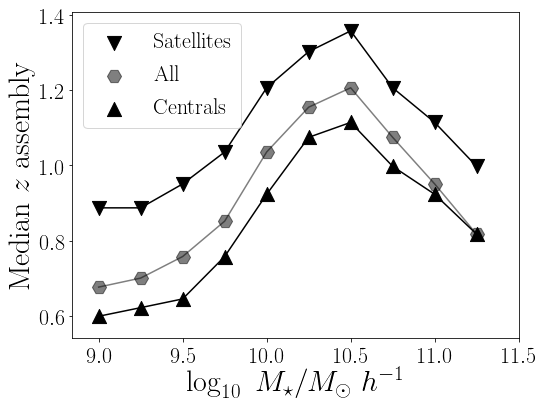

In [7]:
plt.figure(figsize=(8,6))

plt.plot(median_sat['log_mass_bins'], median_sat['median_assembly'], color='black')
plt.scatter(median_sat['log_mass_bins'], median_sat['median_assembly'], marker='v', s=200, label='Satellites', color='black')

plt.plot(median_all['log_mass_bins'], median_all['median_assembly'], color='black', alpha=0.5)
plt.scatter(median_all['log_mass_bins'], median_all['median_assembly'], marker='H', s=200, label='All', color='black', alpha=0.5)

plt.plot(median_central['log_mass_bins'], median_central['median_assembly'], color='black')
plt.scatter(median_central['log_mass_bins'], median_central['median_assembly'], marker='^', s=200, label='Centrals', color='black')

plt.xlabel("$\log_{10}\ M_{\mathrm{\star}} / M_{\odot}\ h^{-1}$")
plt.ylabel("Median $z$ assembly")
plt.legend(fontsize=SMALL_SIZE)
plt.xticks(np.arange(9.0, 12.0, 0.5))

plt.savefig("median_assembly.pdf", bbox_inches='tight')

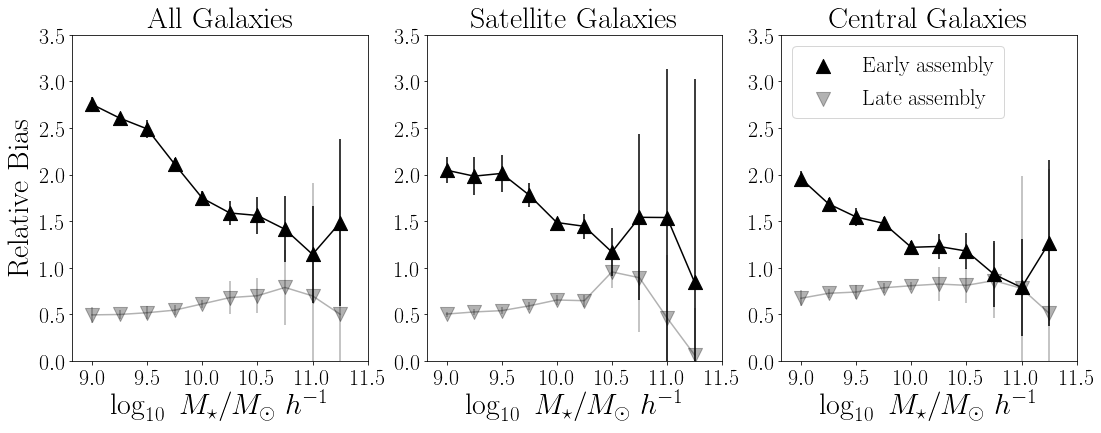

In [12]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.scatter(ratio_all['log_mass_bins'], ratio_all['ratio_early_mean'], marker='^', s=200, color='black', label='Early assembly')
plt.errorbar(ratio_all['log_mass_bins'], ratio_all['ratio_early_mean'], ratio_central['ratio_early_std'], color='black')
plt.scatter(ratio_all['log_mass_bins'], ratio_all['ratio_late_mean'], marker='v', s=200, color='black', alpha=0.3, label='Late assembly')
plt.errorbar(ratio_all['log_mass_bins'], ratio_all['ratio_late_mean'], ratio_central['ratio_late_std'], color='black', alpha=0.3)

plt.title('All Galaxies')
plt.ylim([0.0, 3.5])
plt.xlabel("$\log_{10}\ M_{\mathrm{\star}} / M_{\odot}\ h^{-1}$")
plt.ylabel("Relative Bias")
plt.xticks(np.arange(9.0, 12.0, 0.5))


plt.subplot(1,3,2)
plt.scatter(ratio_sat['log_mass_bins'], ratio_sat['ratio_early_mean'], marker='^', s=200, color='black')
plt.errorbar(ratio_sat['log_mass_bins'], ratio_sat['ratio_early_mean'], ratio_sat['ratio_early_std'], color='black')
plt.scatter(ratio_sat['log_mass_bins'], ratio_sat['ratio_late_mean'], marker='v', s=200, color='black', alpha=0.3)
plt.errorbar(ratio_sat['log_mass_bins'], ratio_sat['ratio_late_mean'], ratio_sat['ratio_late_std'], color='black', alpha=0.3)

plt.title('Satellite Galaxies')
plt.ylim([0.0, 3.5])
plt.xlabel("$\log_{10}\ M_{\mathrm{\star}} / M_{\odot}\ h^{-1}$")
plt.xticks(np.arange(9.0, 12.0, 0.5))


plt.subplot(1,3,3)
plt.scatter(ratio_central['log_mass_bins'], ratio_central['ratio_early_mean'], marker='^', s=200, color='black', label='Early assembly')
plt.errorbar(ratio_central['log_mass_bins'], ratio_central['ratio_early_mean'], ratio_central['ratio_early_std'], color='black')
plt.scatter(ratio_central['log_mass_bins'], ratio_central['ratio_late_mean'], marker='v', s=200, color='black', alpha=0.3, label='Late assembly')
plt.errorbar(ratio_central['log_mass_bins'], ratio_central['ratio_late_mean'], ratio_central['ratio_late_std'], color='black', alpha=0.3)

plt.title('Central Galaxies')
plt.ylim([0.0, 3.5])
plt.legend(fontsize=SMALL_SIZE, loc=2)
plt.xlabel("$\log_{10}\ M_{\mathrm{\star}} / M_{\odot}\ h^{-1}$")
plt.xticks(np.arange(9.0, 12.0, 0.5))

plt.savefig("bias_galaxies.pdf", bbox_inches='tight')

In [9]:
formation_data = np.loadtxt("/Users/forero/Illustris_data/formation_times_TNG300/301/Galaxies/All_Galaxies/ZM_Galaxies3001.dat")
log10_stellar_mass  = np.log10(formation_data[:,4]) + 10
positions = formation_data[:, 5:]
formation_times = formation_data[:, 3]
ratio_all = compute_ratio(log10_stellar_mass, formation_times, positions)

EARLY 20873
LATE 20873
EARLY 18447
LATE 18447
EARLY 15184
LATE 15184
EARLY 13970
LATE 13970
EARLY 11405
LATE 11405
EARLY 6890
LATE 6890
EARLY 3056
LATE 3056
EARLY 1288
LATE 1288
EARLY 502
LATE 502
EARLY 230
LATE 230


In [10]:
min_mass = 10.0
max_mass = 10.25

ii = (log10_stellar_mass>min_mass) & (log10_stellar_mass < max_mass)
all_pos = positions[ii,:]
all_formation_z = formation_times[ii]
percentiles = np.percentile(all_formation_z, [25,75])
ii_early = all_formation_z >= percentiles[1]
ii_late  = all_formation_z <= percentiles[0]
early_pos = all_pos[ii_early,:]
late_pos = all_pos[ii_late, :]

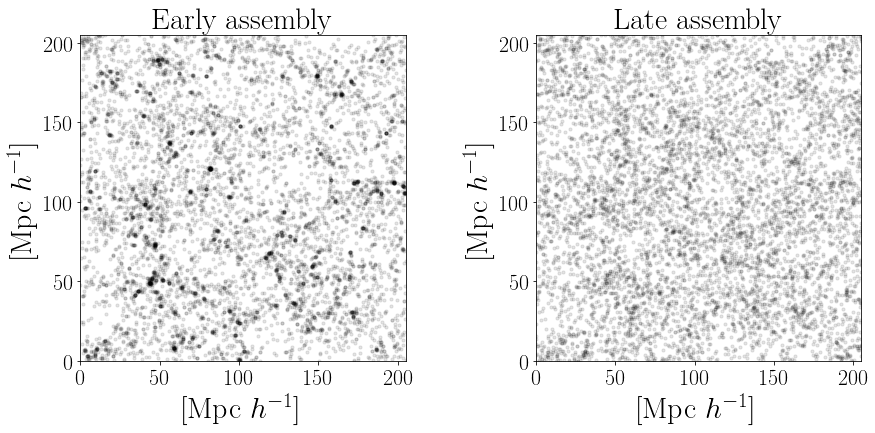

In [11]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ii_z = early_pos[:,2]<210000
plt.scatter(early_pos[ii_z,0]/1000, early_pos[ii_z,1]/1000, s=10.0, alpha=0.1, color='black')
plt.title('Early assembly'.format(int(np.count_nonzero(ii_z)/1000)))
plt.axis('equal')
plt.xlim([0,205])
plt.ylim([0,205])
plt.xlabel("[Mpc $h^{-1}]$")
plt.ylabel("[Mpc $h^{-1}]$")
_ = plt.xticks(np.arange(0,250,50))


plt.subplot(1,2,2)
ii_z = late_pos[:,2]<210000
plt.scatter(late_pos[ii_z,0]/1000, late_pos[ii_z,1]/1000, s=10.0, alpha=0.1, color='black')
plt.title('Late assembly'.format(int(np.count_nonzero(ii_z)/1000)))
plt.axis('equal')
plt.xlim([0,205])
plt.ylim([0,205])
plt.xlabel("[Mpc $h^{-1}]$")
plt.ylabel("[Mpc $h^{-1}]$")
_ = plt.xticks(np.arange(0,250,50))

plt.subplots_adjust(wspace=0.4)
plt.savefig("scatter_assembly.pdf", bbox_inches='tight')

In [63]:
print(len(late_pos[ii_z,1]))

7348
